In [1]:
#!pip install shap

In [51]:
allXs = []
p=10
N=20

for i in range(p):
    allXs.append([np.random.randint(0, 10, N)])#i+2
    
rlvFtrs = np.array([0] * p)
  # rlvFtrs[np.random.randint(1, 11, 5)] = 1
rlvFtrs[np.random.choice(range(0, 10), 5, replace=False)] = 1

Xrlv = np.array([0]*N) 

for k in (np.where(rlvFtrs == 1)[0]):
    Xrlv = Xrlv + allXs[k]/(k+1)
    #print(type(k))

#np.where(rlvFtrs == 1)[0]

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


array([1, 3, 6, 7, 8], dtype=int64)

In [26]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import shap 

import time

from scipy.stats import logistic

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [27]:
def SimulateData_simple(N=1000, # number of rows in data
                        p=50, # number of simulations
                        K = 5, # number of informative features, must be less than p !
                        relevance = 0.15, # signal srength (0 for NULL)
                        #  prevResults= NULL, #legacy, not used
                        ntree = 100, #number of trees in forest
                        #correctBias = c(inbag=TRUE,outbag=TRUE),
                        verbose=0,
                        n_features = 2):
  
  #VERY dangerous to put this into the function
  #random.seed(123)

  shap_avs = np.array([0,0,0,0,0]) # Initializes the first array
  ft_importances = np.array([0,0,0,0,0]) # Initializes the first array
  shap_vals = np.array([0,0,0,0,0]) # Initializes the first array
  allDFs = [] # List of DFs that will be filled


  allXs = []

  for i in range(p):
    allXs.append([np.random.randint(0, i+2, N)])
  
  rlvFtrs = np.array([0] * p)
  # rlvFtrs[np.random.randint(1, 11, 5)] = 1
  rlvFtrs[np.random.choice(range(0, 10), K, replace=False)] = 1
  position = np.where(rlvFtrs == 1)[0]

  Xrlv = np.array([0]*N) 

  for k in (np.where(rlvFtrs == 1)[0]):
    Xrlv = Xrlv + allXs[k]#/(k+1)

  if verbose:
        print(rlvFtrs)
        print(position)
        return(Xrlv,allXs,rlvFtrs)
        
  y = np.array([]) 

  for i in range(N):
    y = np.append(y, np.random.binomial(n = 1, p = logistic.cdf(2*Xrlv[0][i]/5 - 1), size = 1))

  x_train = pd.DataFrame(np.concatenate(allXs).reshape(N, p, order='F')) 


  rf = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=ntree,max_features=n_features) 
  rf.fit(x_train, y)
  feature_importances = rf.feature_importances_
  # print(feature_importances)
  
  shap_values = shap.TreeExplainer(rf).shap_values(x_train)
  shap_averages = np.sum(np.absolute(shap_values), axis=0)

  '''
  shap_vals = np.vstack((shap_vals, shap_values))
  shap_avs = np.vstack((shap_avs, shap_averages))
  ft_importances = np.vstack((ft_importances, feature_importances))
  allDFs.append(x_train)
  
  shap_vals = np.delete(shap_vals, (0), axis=0) # Deletes the initialization
  shap_avs = np.delete(shap_avs, (0), axis=0) # Deletes the initialization
  ft_importances = np.delete(ft_importances, (0), axis=0) # Deletes the initialization
  '''

  return(shap_values, shap_averages, feature_importances, x_train, rlvFtrs)


In [40]:
#shap_values, shap_averages, feature_importances, x_train, rlvFtrs 
Xrlv,allXs,rlvFtrs = SimulateData_simple(N=10,p=10,K= 3, verbose=1)

[0 0 1 0 1 0 0 0 1 0]
[2 4 8]


In [41]:
shap_averages[np.where(rlvFtrs == 1)[0]]

array([1.32455477, 1.90176433, 1.16427315])

In [37]:
feature_importances[np.where(rlvFtrs == 1)[0]]

array([0.01888745, 0.02472592, 0.01605772, 0.01797526, 0.01723439])

In [38]:
feature_importances[np.where(rlvFtrs == 0)[0]]

array([0.01994722, 0.01762622, 0.01704888, 0.01821848, 0.01880401,
       0.02419638, 0.02037766, 0.01987565, 0.02380255, 0.02188506,
       0.02051598, 0.01986691, 0.02346083, 0.02092725, 0.01759662,
       0.02199408, 0.02108522, 0.02179643, 0.01098787, 0.02345997,
       0.02189089, 0.0189979 , 0.02253153, 0.02014326, 0.01591533,
       0.02049717, 0.01639522, 0.01636477, 0.01770236, 0.01954164,
       0.01927798, 0.02359276, 0.0208788 , 0.01923642, 0.02681836,
       0.01641377, 0.01849903, 0.01965129, 0.02335932, 0.02235209,
       0.02089306, 0.02071195, 0.01540556, 0.02732769, 0.01724785])

In [52]:
for k in (np.where(rlvFtrs == 1)[0]):
    print(allXs[k])

[array([7, 0, 1, 3, 5, 5, 1, 9, 2, 9, 8, 4, 2, 8, 1, 4, 8, 2, 1, 4])]
[array([2, 1, 0, 6, 5, 3, 2, 6, 7, 9, 5, 6, 8, 7, 4, 3, 5, 6, 4, 7])]
[array([9, 6, 7, 0, 0, 7, 2, 0, 3, 7, 6, 8, 5, 4, 8, 7, 0, 6, 6, 1])]
[array([1, 7, 5, 1, 5, 9, 2, 7, 6, 7, 8, 4, 6, 0, 4, 9, 6, 8, 7, 3])]
[array([7, 3, 5, 3, 5, 6, 1, 4, 5, 6, 4, 7, 2, 2, 4, 1, 4, 0, 4, 3])]


In [63]:
Xrlv = np.array([0]*N) 
for k in (np.where(rlvFtrs == 1)[0]):
    Xrlv = Xrlv + allXs[k]/(k+1)
print(Xrlv)

[[6.18849206 2.31547619 2.68055556 3.45833333 4.93055556 6.04166667
  1.6468254  7.31944444 4.48412698 9.29166667 7.5515873  5.92063492
  4.68650794 6.54365079 3.58730159 4.98611111 6.44444444 4.35714286
  3.6765873  4.60119048]]


In [62]:
print(7/2 + 2/4 + 9/7 + 1/8 + 7/9)
np.where(rlvFtrs == 1)[0]

6.188492063492063


array([1, 3, 6, 7, 8], dtype=int64)

In [43]:
for i in range(10):
    print(logistic.cdf(2*Xrlv[0][i]/5 - 1))

0.9308615796566533
0.9852259683067269
0.9852259683067269
0.7310585786300049
0.9002495108803148
0.9308615796566533
0.9677045353015495
0.9677045353015495
0.2689414213699951
0.9969815836752917


In [18]:
#explorations:
allXs = []

for i in range(8):
  allXs.append([np.random.randint(0, i+2, 100)])

y= np.random.binomial(n = 1, p = 0.5, size = 100)
x_train = pd.DataFrame(np.concatenate(allXs).reshape(100, 8, order='F'))
x_train.shape

rf = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=50,max_features=2) 
rf.fit(x_train, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
import warnings
warnings.filterwarnings('ignore')
shap_values = shap.TreeExplainer(rf, feature_perturbation="tree_path_dependent" ).shap_values(x_train)

In [15]:
start_time = time.time()
random.seed(123)

shap_vals, shap_avs, ft_importances, x_train, rlvFtrs = ([] for i in range(5))
nSims = 50

for i in range(nSims):

  first, second, third, fourth, fifth = SimulateData_simple(N=1000, p=50)

  shap_vals.append(first)
  shap_avs.append(second)
  ft_importances.append(first)
  x_train.append(fourth)
  rlvFtrs.append(fifth)


print("--- %s seconds ---" % (time.time() - start_time))

NameError: ignored

In [1]:
start_time = time.time()

nSims = 50

for i in range(nSims):

  first, second, third, fourth, fifth = SimulateData_simple(N=1000, p=50)

 # shap_vals.append(first)
  shap_avs.append(second)
  ft_importances.append(first)
 # x_train.append(fourth)
  rlvFtrs.append(fifth)


print("--- %s seconds ---" % (time.time() - start_time))

NameError: ignored

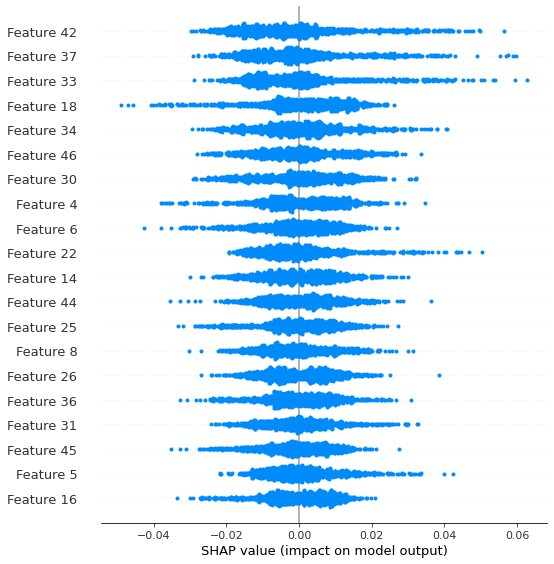

In [0]:
shap.summary_plot(shap_vals)

In [0]:
rlvFtrs # The relevant features

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

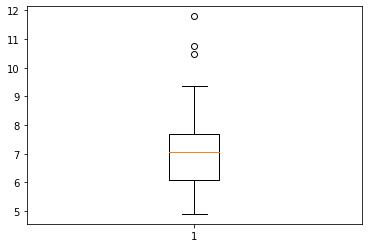

In [0]:
plt.boxplot(shap_avs);

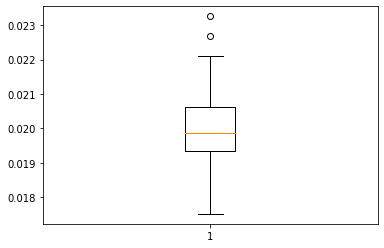

In [0]:
plt.boxplot(ft_importances);

In [9]:
rlvFtrs_oneArray = np.concatenate(rlvFtrs)
shap_avs_oneArray = np.concatenate(shap_avs)

fpr, tpr, thresholds = metrics.roc_curve(rlvFtrs_oneArray, shap_avs_oneArray)
metrics.auc(fpr, tpr)

0.5023057777777777

In [10]:
rlvFtrs_oneArray.shape


(2500,)

In [0]:
rlvFtrs

In [23]:
from datetime import timedelta

class YouTubeVideo(object):
    def __init__(self, id, width=400, height=300, start=timedelta()):
        self.id = id
        self.width = width
        self.height = height
        self.start = start.total_seconds()

    def _repr_html_(self):
        return """
            <iframe
                width="%i"
                height="%i"
                src="http://www.youtube.com/embed/%s?start=%i"
                frameborder="0"
                allowfullscreen
            ></iframe>
        """%(self.width, self.height, self.id, self.start)

#### Relation of Reinforcement Learning to bandits

In [24]:
YouTubeVideo("ZtP4eEYjJ2I", start=timedelta(seconds=24))

In [25]:
YouTubeVideo("V1eYniJ0Rnk", start=timedelta(seconds=25))

In [66]:
np.arange(0,12).reshape(4, 3, order='F')

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [67]:
np.arange(0,12).reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [73]:
allXs = []
N=10
p=4

for i in range(p):
  allXs.append([np.arange(1+i*N,1+N+i*N )])

allXs
np.concatenate(allXs)#.reshape(N, p, order='F')

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]])

In [70]:
pd.DataFrame(np.concatenate(allXs).reshape(N, p, order='F')) 

,0,1,2,3
0,1,23,6,28
1,11,33,16,38
2,21,4,26,9
3,31,14,36,19
4,2,24,7,29
5,12,34,17,39
6,22,5,27,10
7,32,15,37,20
8,3,25,8,30
9,13,35,18,40
